插值法是常用的求解离散点的函数的方法，其思路和拟合有明显的差异，导致两者适用范围不同，这里将介绍部分插值的python方法。
1. 线性插值 : [参考](https://baike.baidu.com/item/%E7%BA%BF%E6%80%A7%E6%8F%92%E5%80%BC/19113392?fr=aladdin)
2. 样条插值:  [参考](https://baike.baidu.com/item/%E4%B8%89%E6%AC%A1%E6%A0%B7%E6%9D%A1%E6%8F%92%E5%80%BC/3476729?fr=aladdin)
3. 方差曲面插值：例，期权的隐含波动率曲面；

## 1 数据准备
1. 引入所需包：在scipy中，所有的与函数插值相关的功能都在scipy.interpolate模块中
2. 查看插补方法：可以自己尝试
3. x为离散点(1,3,5,7,9,11,13)
4. y是观察到的x对应值：sin（x）
5. 设置图像大小：（12,6）
6. 画（x，y）的散点图
7. 给图加标题，设置字体大小30

['Akima1DInterpolator', 'BPoly', 'BSpline', 'BarycentricInterpolator', 'BivariateSpline']


Text(0.5, 1.0, '$f(x)$distribustion')

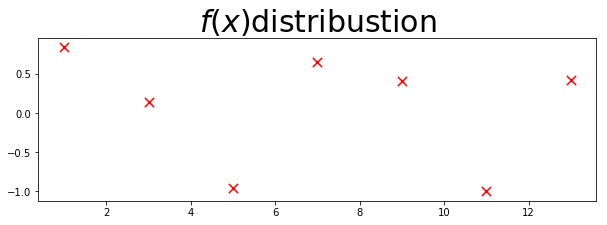

In [2]:
from scipy import interpolate
import numpy as np
from matplotlib import pylab
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')  # 告警信息不显示
print (dir(interpolate)[:5])
x = np.linspace(1.0, 13.0, 7)
y = np.sin(x)
pylab.figure(figsize = (10,3))
pylab.scatter(x,y, s = 85, marker='x', color = 'r')
pylab.title(u'$f(x)$distribustion', fontsize=30)

## 2 线性插值

首先我们使用最简单的线性插值算法，这里面只要将spline的参数order设置为1即可：
- 增加x个数：1到13均匀分布的500个数
- 对y插值：通过线性插值算法，产生500个y值，便于后面画曲线图

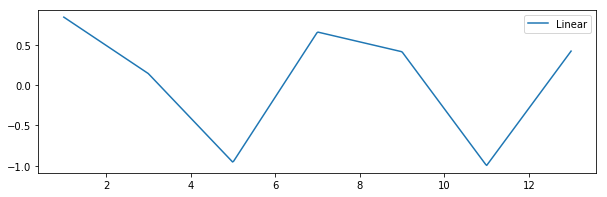

In [3]:
xnew = np.linspace(1.0,13.0,500)
ynewLinear = interpolate.spline(x,y,xnew,order = 1)
ynewLinear[:5]
pylab.figure(figsize = (10,3))
pylab.plot(xnew,ynewLinear)
pylab.legend(['Linear'])

## 3 样条插值
spline函数默认的方法，即为样条插值，将order设置为3即可：

In [6]:
ynewCubicSpline = interpolate.spline(x,y,xnew,order = 3)  #三次样条插值
ynewCubicSpline[:5]

array([0.84147098, 0.86598588, 0.88928385, 0.91138025, 0.93229042])

splrep函数提供的样条插值

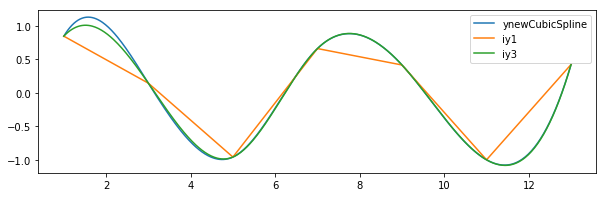

In [7]:
#进行一阶样条插值
ipo1=interpolate.splrep(x,y,k=1) #源数据点导入，生成参数
iy1=interpolate.splev(xnew,ipo1) #根据观测点和样条参数，生成插值
 
#进行三次样条插值
ipo3=interpolate.splrep(x,y,k=3) #源数据点导入，生成参数
iy3=interpolate.splev(xnew,ipo3) #根据观测点和样条参数，生成插值

# 画图对比
pylab.figure(figsize = (10,3))
pylab.plot(xnew,ynewCubicSpline)
pylab.plot(xnew,iy1)
pylab.plot(xnew,iy3)
pylab.legend(['ynewCubicSpline', 'iy1','iy3'])

## 4 与真实值的对比
现在，我们把各个插值和真实值比较，500个真实y值通过sin（xnew）函数获得：

$$f(x) = \mathrm{sin}(x)$$

对于我们这个例子中的目标函数而言，由于本身目标函数是光滑函数，则越高阶的样条插值的方法，插值效果越好。

In [8]:
ynewReal = np.sin(xnew)  
ynewReal[:5]

array([0.84147098, 0.85421967, 0.86647437, 0.87822801, 0.88947378])

Text(0.5, 1.0, '$f(x)$ multiple insert_values methods')

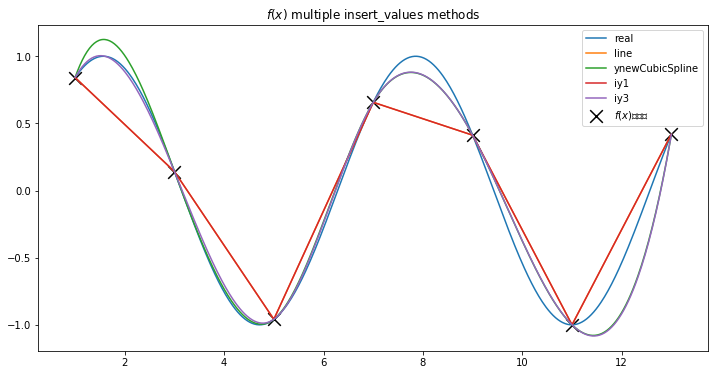

In [9]:
pylab.figure(figsize = (12,6))
pylab.plot(xnew,ynewReal)
pylab.plot(xnew,ynewLinear)
pylab.plot(xnew,ynewCubicSpline)
pylab.plot(xnew,iy1)
pylab.plot(xnew,iy3)
pylab.scatter(x,y, s = 160, marker='x', color = 'k')
pylab.legend([u'real', u'line', u'ynewCubicSpline', 'iy1','iy3',u'$f(x)$离散点'])
pylab.title(u'$f(x)$ multiple insert_values methods', fontsize =12)

可以看出，样条插值对该数据的拟合更好，splrep提供的一阶样条插值近似线性插值，三阶样条插值近似spline函数的样条插值

## 5 方差曲面插值

市场上期权价格一般以隐含波动率的形式报出，一般来讲在市场交易时间，交易员可以看到类似的波动率矩阵（Volatilitie Matrix):
交易员可以看到市场上离散值的信息，但是如果可以获得一些隐含的信息更好：例如，在2015年6月25日以及2015年9月25日之间，波动率的形状会是怎么样的？
我们可以通过方差曲面插值构造“期权波动率曲面"

In [10]:
import pandas as pd
from datetime import datetime as Date
from datetime import  timedelta
pd.options.display.float_format = '{:,>.2f}'.format
dates = [Date(2015,3,25), Date(2015,4,25), Date(2015,6,25), Date(2015,9,25)]
strikes = [2.2, 2.3, 2.4, 2.5, 2.6]
blackVolMatrix = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])
table = pd.DataFrame(blackVolMatrix * 100, index = strikes, columns = dates, )
table.index.name = u'行权价'
table.columns.name = u'到期时间'
print (u'2015年3月3日10时波动率矩阵')
table

2015年3月3日10时波动率矩阵


到期时间,2015-03-25 00:00:00,2015-04-25 00:00:00,2015-06-25 00:00:00,2015-09-25 00:00:00
行权价,,,,
2.20,32.56,29.75,29.26,27.68
2.30,28.84,29.20,27.39,26.51
2.40,27.66,27.35,25.89,25.28
2.50,26.97,25.57,25.80,25.41
2.60,27.77,24.82,27.34,24.81


我们并不是直接在波动率上进行插值，而是在方差矩阵上面进行插值。方差和波动率的关系如下：

$$\mathrm{Var}(K,T) = \sigma(K,T)^2T$$

所以下面我们将通过处理，获取方差矩阵（Variance Matrix):

In [11]:
evaluationDate = Date(2015,3,3)
ttm = np.array([(d - evaluationDate) / 365.0 for d in dates])
ttm = ttm/timedelta(days=1)   #Converting a timedelta to a float
varianceMatrix = (blackVolMatrix**2) * ttm
varianceMatrix

array([[0.006391085982469228, 0.012848901332342776, 0.026741136831691503,
        0.043242053307068894],
       [0.005013900866114099, 0.01237794155734418, 0.023422767467278935,
        0.039669433294732576],
       [0.004611251526876472, 0.01086231055809625, 0.02093127579639813,
        0.03607930721083693],
       [0.004384133665323341, 0.009490904186056493, 0.020795214248051065,
        0.0364337607306079],
       [0.004649180477481717, 0.008947469311828823, 0.023347172699376625,
        0.03475377938508424]], dtype=object)

这里的值varianceMatrix就是变换而得的方差矩阵。

下面我们将在行权价方向以及时间方向同时进行线性插值，具体地，行权价方向：

$$\mathrm{Var}(K,t)= \frac{K_2 - K}{K_2 - K_1} \mathrm{Var}(K_1,t) + \frac{K - K_1}{K_2 - K_1} \mathrm{Var}(K_2,t)$$

时间方向：

$$\mathrm{Var}(K) = \frac{t_2 - t}{t_2 - t_1} \mathrm{Var}(K,t_1) + \frac{t - t_1}{t_2 - t_1} \mathrm{Var}(K,t_2)$$

这个过程在scipy中可以直接通过interpolate模块下interp2d来实现：

* ```ttm``` 时间方向离散点
* ``strikes`` 行权价方向离散点
* ``varianceMatrix`` 方差矩阵，列对应时间维度；行对应行权价维度
* `` kind = 'cubic'`` 样条插值，linear指示插值以线性方式进行

返回的interp对象可以用于获取任意点上插值获取的方差值：

In [12]:
interp = interpolate.interp2d(ttm, strikes, varianceMatrix, kind = 'cubic')  #kind：cubic linear
interp(ttm[0], strikes[0]) 

array([0.00639109])

最后，我们获取整个平面上所有点的方差值，再转换为波动率曲面。

In [13]:
sMeshes = np.linspace(strikes[0], strikes[-1], 400)
tMeshes = np.linspace(ttm[0], ttm[-1], 200)
interpolatedVarianceSurface = np.zeros((len(sMeshes), len(tMeshes)))
for i, s in enumerate(sMeshes):
    for j, t in enumerate(tMeshes):
        interpolatedVarianceSurface[i][j] = interp(t,s)
        
interpolatedVolatilitySurface = np.sqrt((interpolatedVarianceSurface / tMeshes))
print (u'行权价方向网格数：', np.size(interpolatedVolatilitySurface, 0))
print (u'到期时间方向网格数：', np.size(interpolatedVolatilitySurface, 1))

行权价方向网格数： 400
到期时间方向网格数： 200


选取某一个到期时间上的波动率点，看一下插值的效果。这里我们选择到期时间最近的点：2015年3月25日：

Text(0.5, 1.0, 'Option volatility,Date of Expiry201503-25')

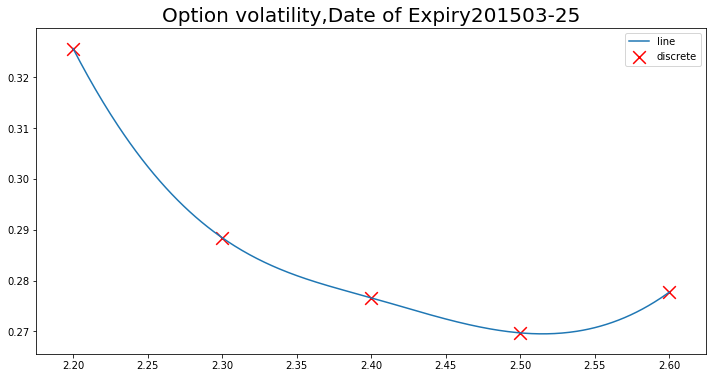

In [14]:
pylab.figure(figsize = (12,6))
pylab.plot(sMeshes, interpolatedVolatilitySurface[:, 0])
pylab.scatter(x = strikes, y = blackVolMatrix[:,0], s = 160,marker = 'x', color = 'r')
pylab.legend([u'line', u'discrete'])
pylab.title(u'Option volatility,Date of Expiry201503-25', fontsize=20)

最终，我们把整个曲面的图像画出来看看：

Text(0.5, 0, 'volatility(%)')

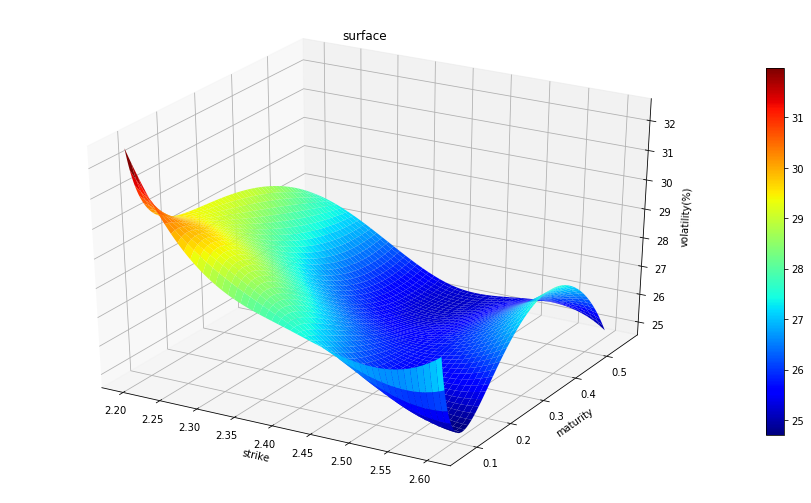

In [15]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

maturityMesher, strikeMesher = np.meshgrid(tMeshes, sMeshes)
pylab.figure(figsize = (16,9))
ax = pylab.gca(projection = '3d')
surface = ax.plot_surface(strikeMesher, maturityMesher, interpolatedVolatilitySurface*100, cmap = cm.jet)
pylab.colorbar(surface,shrink=0.75)
pylab.title(u'surface')
pylab.xlabel("strike")
pylab.ylabel("maturity")
ax.set_zlabel(r"volatility(%)")